Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [97]:
df = pd.read_csv('/content/stock_data.csv')

Data Exploration and Cleaning

In [98]:
# Display the first few rows of the dataset
print(df.head(5))

       Date   Open   High    Low  Close    Volume  Name
0  1/3/2006  39.69  41.22  38.79  40.91  24232729  AABA
1  1/4/2006  41.22  41.90  40.77  40.97  20553479  AABA
2  1/5/2006  40.93  41.73  40.85  41.53  12829610  AABA
3  1/6/2006  42.88  43.57  42.80  43.21  29422828  AABA
4  1/9/2006  43.10  43.66  42.82  43.42  16268338  AABA


In [99]:
# Check for missing values
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [100]:
# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [101]:
# Summary statistics
print(df.describe())

              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     28.426479    28.766532    28.066558    28.412726  2.158391e+07
std      13.257242    13.356692    13.157326    13.258163  1.926231e+07
min       9.100000     9.480000     8.940000     8.950000  1.939061e+06
25%      16.175000    16.385000    15.970000    16.130000  1.248025e+07
50%      27.180000    27.490000    26.820000    27.100000  1.732130e+07
75%      36.655000    37.035000    36.305000    36.635000  2.512757e+07
max      73.020000    73.250000    72.460000    72.930000  4.382317e+08


In [102]:
# Data types of columns
print(df.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


Data Preprocessing

In [103]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

In [104]:
df.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Time Series Analysis

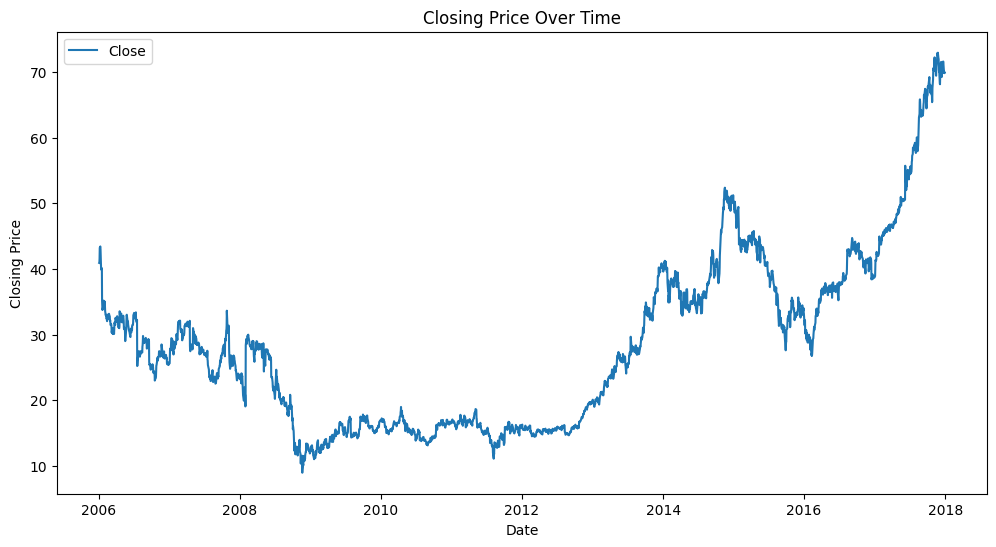

In [105]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

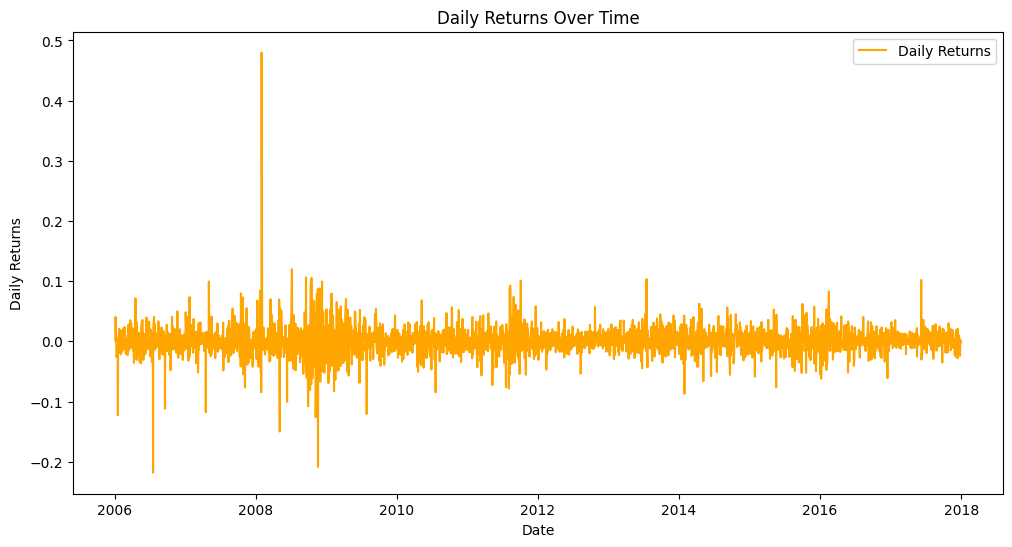

In [106]:
# Compute daily returns
df['Daily_Returns'] = df['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Returns'], label='Daily Returns', color='orange')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

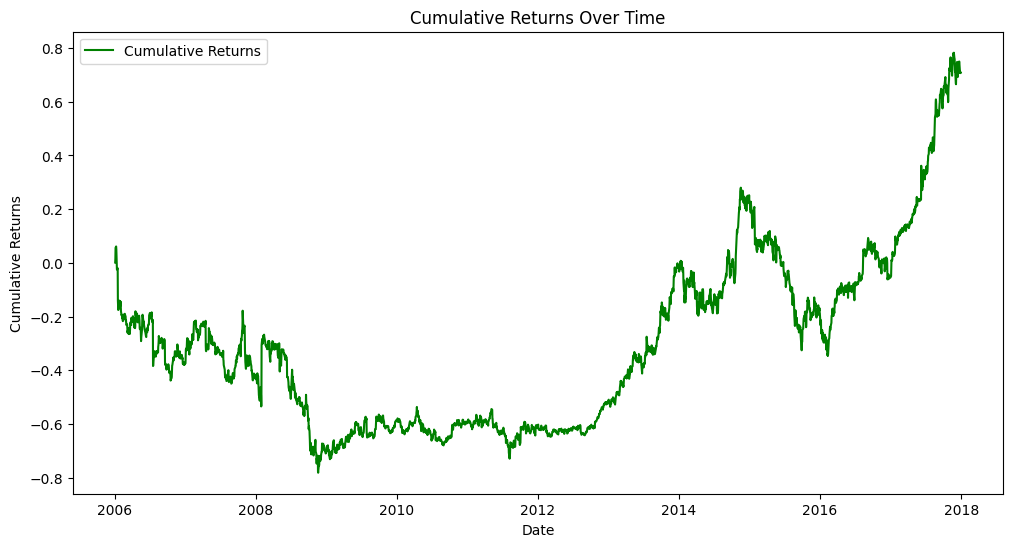

In [107]:
# Compute cumulative returns
df['Cumulative_Returns'] = (1 + df['Daily_Returns']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

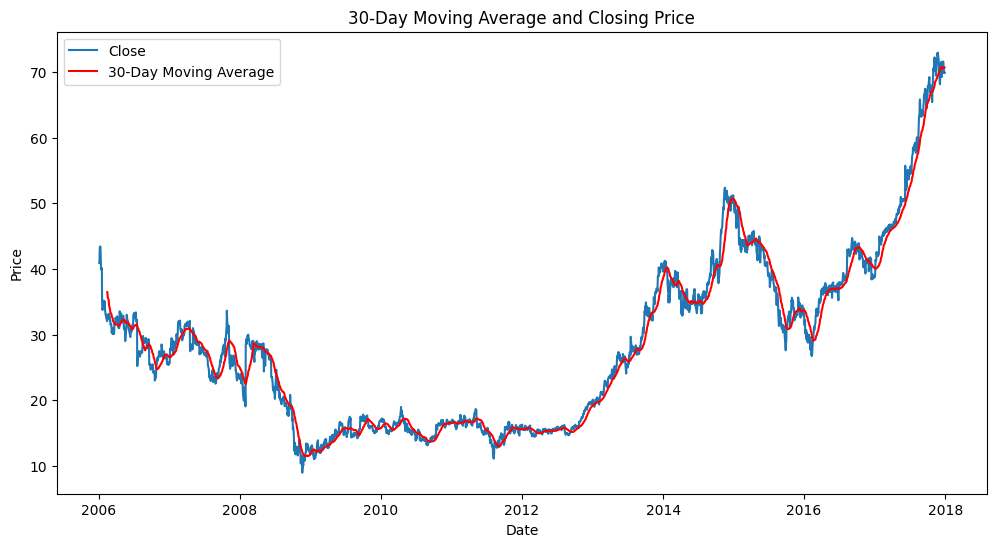

In [108]:
# Compute 30-day moving average
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()

# Plot the 30-day moving average and closing price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['30_Day_MA'], label='30-Day Moving Average', color='red')
plt.title('30-Day Moving Average and Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [109]:
# Compute volatility (standard deviation of daily returns)
volatility = df['Daily_Returns'].std()

# Print volatility
print('Volatility (Standard Deviation of Daily Returns):', volatility)

Volatility (Standard Deviation of Daily Returns): 0.024343510513038562


In [110]:
# Compute annualized volatility
annualized_volatility = volatility * np.sqrt(252)  # 252 trading days in a year
print('Annualized Volatility:', annualized_volatility)

Annualized Volatility: 0.38644124913471856


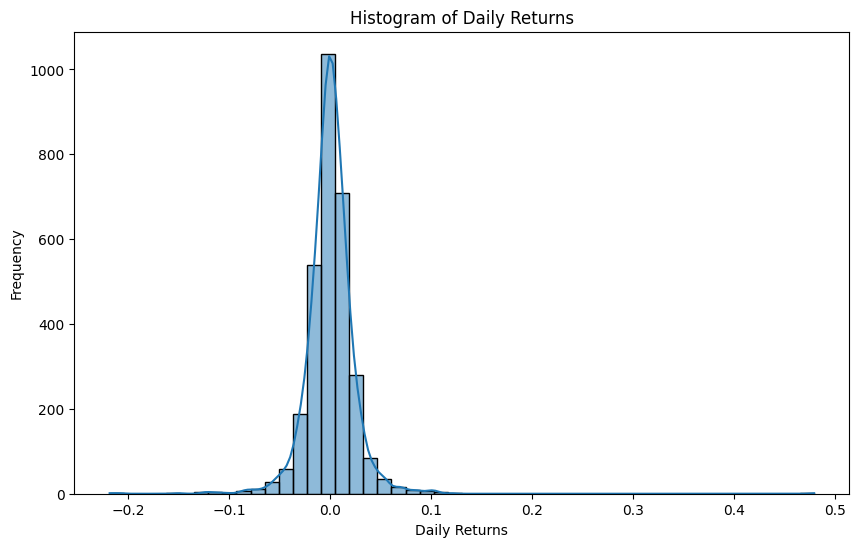

In [111]:
# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Returns'].dropna(), bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

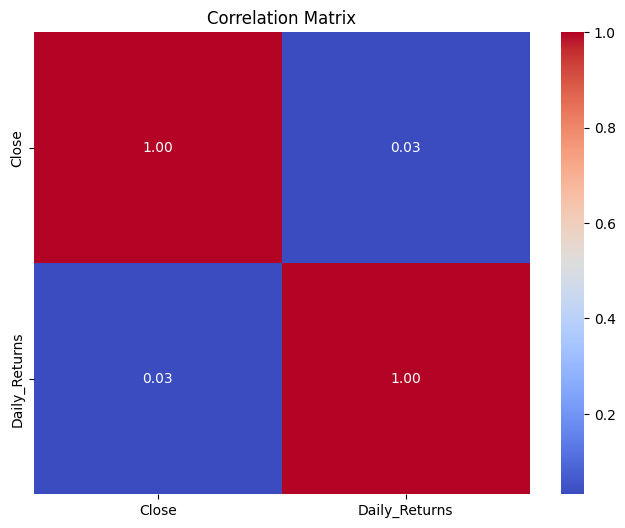

In [112]:
# Compute correlation matrix
correlation_matrix = df[['Close', 'Daily_Returns']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()